# Lecture 11: The Expectation and Variance of Random Variables
***

We'll need Numpy and Matplotlib for this notebook, so let's load them. 

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - Easy Peasy Plinko 
*** 

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In this exercise, we'll look at a simplified version of Plinko, with the following layout: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko_small.png)

Note that in this simplified version of Plinko there are $6$ rows of pegs and $7$ bins with monetary values $\$0 - \$6$.  Finally, the player is required to drop the disc directly onto the single peg in the top-most row. 

**Part A**: Write a function plinko_trial that takes as arguments the number of rows of pegs $n$, and the probability $p$ that a disc falls to the _right_ when it hits a peg, and returns the value of the bin that it lands in. 

In [29]:
def plinko_trial(n = 6, p = 0.5):
    # n is num of rows of pegs
    # p is probability of falling right at a given peg
    total = 0 # this is clever
    for i in range(n):
        #if(np.random.uniform() < p):
        #    total += 1
        #OR
        total += np.random.choice([0,1], p=[1-p,p])
    
    return total

**Part B**: Write a function plinko_sim that takes as arguments the number of rows of pegs $n$, and the probability $p$ that a disc falls to the _right_ when it hits a peg, and the number of Plinko trials to simulate, and returns an estimate of the expected value of the winnings from a single round of Plinko.  Run your simulation with $p=0.5$ and observe the results.  Can you make a hypothesis about the expected value of random variable describing the winnings? 

In [30]:
def plinko_sim(n = 6 , p = 0.5, num = 5000):
    avg_total = plinko_trial(n, p)
    for i in range(num-1):
        avg_total += plinko_trial(n, p)
        avg_total *= 0.5
        
    return avg_total
        
plinko_sim()

3.5425446082083116

**Part C**: The following function, plinko_plot, uses the plinko_trial function you wrote in **Part A** and plots running estimates of the expected winnings for Plinko boards with various numbers of rows.  Execute the function with $n=6, ~100,$ and $500$ and comment on any observations that you make. 

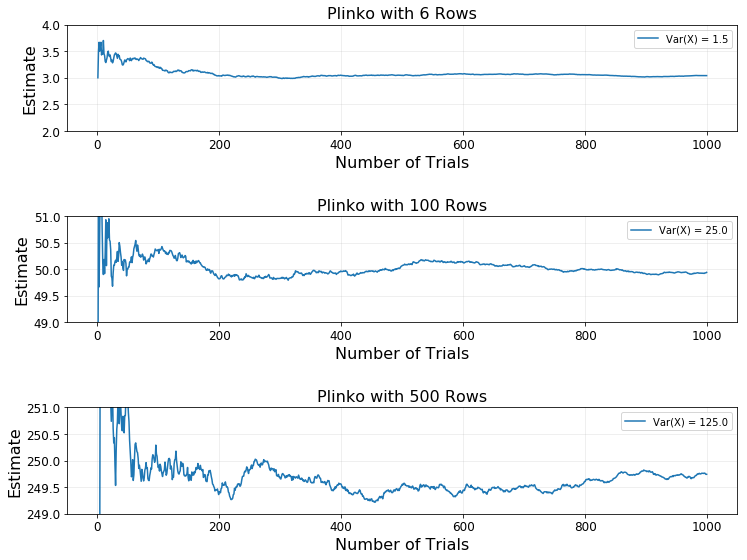

In [35]:
def plinko_plot(num_rows=[6], p=0.5, num_trials=int(1e3), reveal=False):
    
    np.random.seed(1234)
    
    fig, axes = plt.subplots(nrows=len(num_rows), ncols=1, figsize=(12,3*len(num_rows)))
    
    for ii, n in enumerate(num_rows):
        winnings = np.array([plinko_trial(n, p) for kk in range(num_trials)])
        estimates = np.array([np.mean(winnings[:ii]) for ii in range(1,num_trials)])
        if not reveal: 
            axes[ii].plot(range(1,num_trials), estimates)
        else:
            vstr = "{:.1f}".format(.25*n)
            axes[ii].plot(range(1,num_trials), estimates, label=r"Var(X) = "+vstr)
        axes[ii].grid(True, alpha=0.25)
        mu = n*p
        axes[ii].set_xlabel("Number of Trials", fontsize=16)
        axes[ii].set_ylabel("Estimate", fontsize=16)
        axes[ii].set_title("Plinko with {} Rows".format(n), fontsize=16)
        axes[ii].set_ylim([mu-1, mu+1])
        plt.sca(axes[ii])
        plt.yticks(np.linspace(mu-1,mu+1,5), fontsize=12)
        plt.xticks(np.linspace(0,num_trials,6), fontsize=12)
        if reveal:
            axes[ii].legend(loc = "upper right")
        
    fig.subplots_adjust(hspace=0.8)
        
plinko_plot([6,100,500], num_trials=int(1e3), reveal = True)

**Part D**: Suppose you were the devious owner of a 10-row Easy Peasy Plinko game and you wanted to make some money off of some unsuspecting carnival goers.  For a given value of $p$ (which you can set by subtly adjusting the placement of pegs) how much should you charge someone to play your game so that you pocket, on average, $\$1$ per game played? 

$6 :)

### Exercise 2
*** 

The probability distribution of a discrete random variable $X$ is given by 

$$
P(X = -1) = \frac{1}{5}, \quad P(X = 0) = \frac{2}{5}, \quad P(X = 1) = \frac{2}{5}
$$

**Part A**: Compute $E[X]$


In [33]:
-1 * (1/5) + 0 * (2/5) + 1 * (2/5)

0.2

**Part B**: Give the probability distribution of the random variable $Y = X^2$ and compute $E[Y]$ using the distribution of $Y$. 

$$
P(Y = 1) = \frac{1}{5}, \quad P(X = 0) = \frac{2}{5}, \quad P(X = 1) = \frac{2}{5} \\
OR \\ 
P(X = 0) = \frac{2}{5}, \quad P(X = 1) = \frac{3}{5}
$$

In [34]:
0 * (2/5) + 1 * (3/5)

0.6

**Part C**: Determine $E[X^2]$ using the change-of-variables formula. Check your answer against the one from **Part B**. 

**Part D**: Determine $\textrm{Var}(X)$. 

### Exercise 3  
*** 

For a certain random variable $X$ it is known that $E[X] = 4$ and $\textrm{Var}(X) = 2$ 

**Part A**: Compute $E[X^2]$


**Part D**: Determine the expectation and variance for the random variable $Y = 1 - 2X$. 

**Part C**: Can you think of a discrete random variable that satisfies $E[X] = 4$ and $\textrm{Var}(X) = 2$? 

**Part D**: Create a series of simple simulations that verify the computations you did in **Parts A-C**. 

### Exercise 4  
*** 

Let $X$ be a continuous random variable with probability density function given by 

$$
f(x) = \left\{ 
\begin{array}{rl}
\dfrac{x}{2} & 0 \leq x \leq 2 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Compute $E[X]$. Before you do the computation, will the expected value lie closer to 0 than 2, or the other way around? 


**Part B**: Compute $\textrm{Var}(X)$. 

**Part C**: Use your results from **Part A** to compute the expectation and variance of the random variable $Y = 2X + 3$. 